## Import Libraries

In [2]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt

## Load the Dataset

In [3]:
data = pd.read_csv('dataset.csv')

## Display Dataset Info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [4]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Correlation Matrix

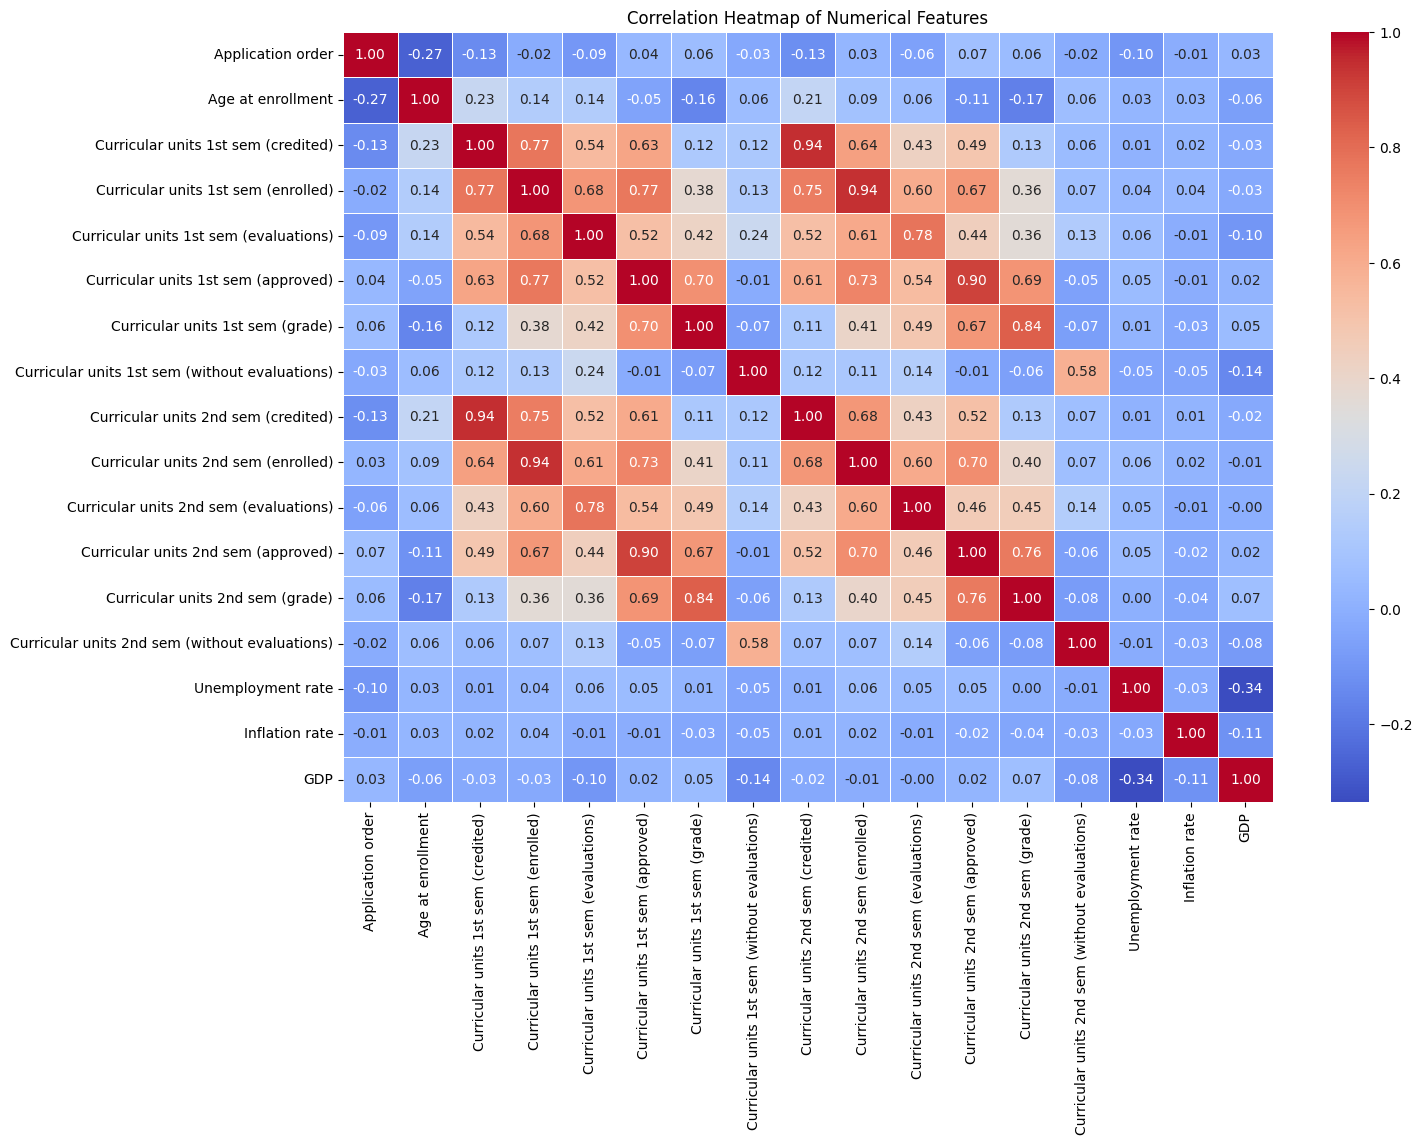

/var/folders/q0/_2hccgrx39v6r5glymkglzdw0000gn/T/ipykernel_72866/2862346313.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=data, palette='Set2')


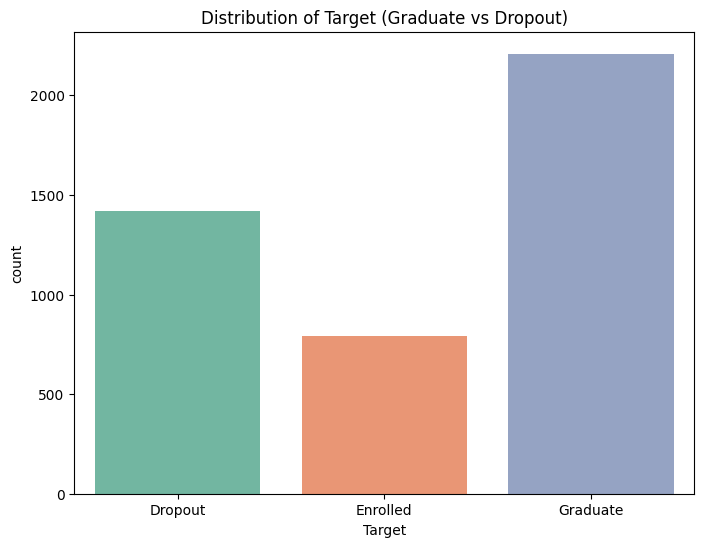

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert categorical columns to category dtype for efficient memory use
categorical_columns = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance',
                       'Previous qualification', 'Nacionality', 'Mother\'s qualification', 'Father\'s qualification',
                       'Mother\'s occupation', 'Father\'s occupation', 'Displaced', 'Educational special needs',
                       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target']

for col in categorical_columns:
    data[col] = data[col].astype('category')

# Correlation between numerical columns
correlation_matrix = data.corr(numeric_only=True)

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Analyze the distribution of the Target variable (Graduate vs Dropout)
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=data, palette='Set2')
plt.title("Distribution of Target (Graduate vs Dropout)")
plt.show()


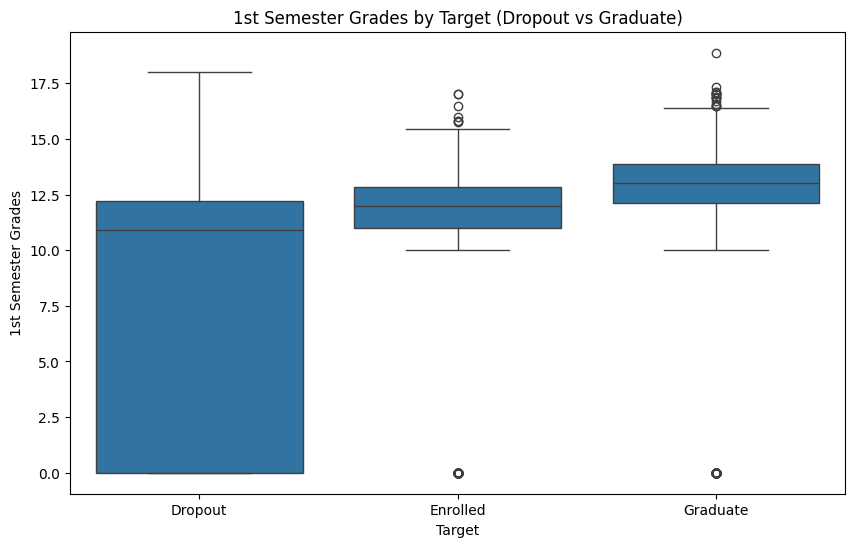

In [7]:
# Boxplot comparing grades in 1st semester for Dropout vs Graduate
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Curricular units 1st sem (grade)', data=data)
plt.title("1st Semester Grades by Target (Dropout vs Graduate)")
plt.xlabel("Target")
plt.ylabel("1st Semester Grades")
plt.show()



## Bar Plot of Dropout Rates by Marital Status

/var/folders/q0/_2hccgrx39v6r5glymkglzdw0000gn/T/ipykernel_72866/1818450763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital status', y='Target', data=data, errorbar=None, palette='Blues')


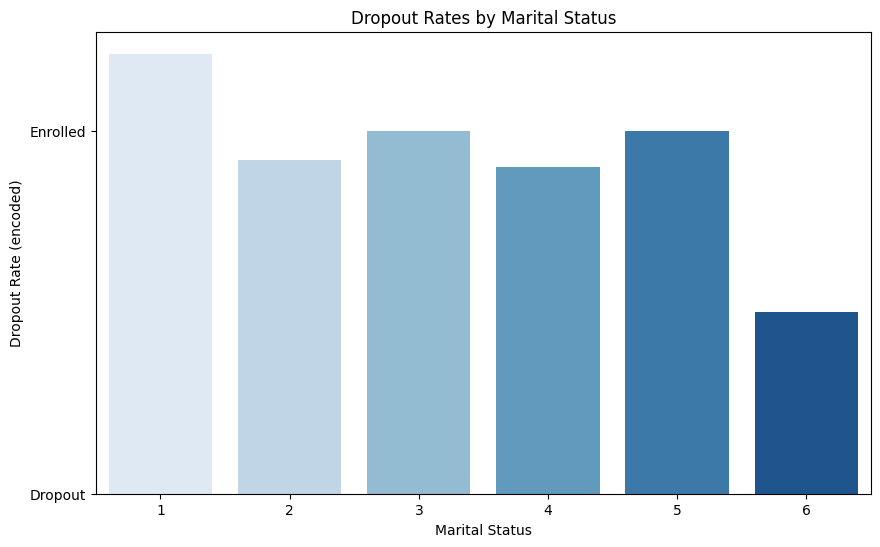

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital status', y='Target', data=data, errorbar=None, palette='Blues')

plt.title("Dropout Rates by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Dropout Rate (encoded)")
plt.gca().invert_yaxis()
plt.show()



1	Single

2	Married

3	Widower

4	Divorced

5	Common-law marriage

6	Legally separated


In [15]:
# Count of 'Target' values for each 'Age at enrollment'
age_target_counts = data.groupby(['Age at enrollment', 'Target']).size().unstack(fill_value=0)
age_target_counts


/var/folders/q0/_2hccgrx39v6r5glymkglzdw0000gn/T/ipykernel_72866/220086616.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_target_counts = data.groupby(['Age at enrollment', 'Target']).size().unstack(fill_value=0)


Target,Dropout,Enrolled,Graduate
Age at enrollment,,,
17,0,2,3
18,202,172,662
19,207,157,547
20,133,140,326
21,93,70,159
22,58,37,79
23,41,24,43
24,56,30,45
25,47,21,25


In [16]:
# Count of 'Target' values for each 'Course'
course_target_counts = data.groupby(['Course', 'Target']).size().unstack(fill_value=0)
course_target_counts


/var/folders/q0/_2hccgrx39v6r5glymkglzdw0000gn/T/ipykernel_72866/3188056021.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  course_target_counts = data.groupby(['Course', 'Target']).size().unstack(fill_value=0)


Target,Dropout,Enrolled,Graduate
Course,,,
1,8,3,1
2,82,37,96
3,71,21,123
4,86,37,87
5,51,42,133
6,90,75,172
7,92,64,14
8,78,21,42
9,134,108,138


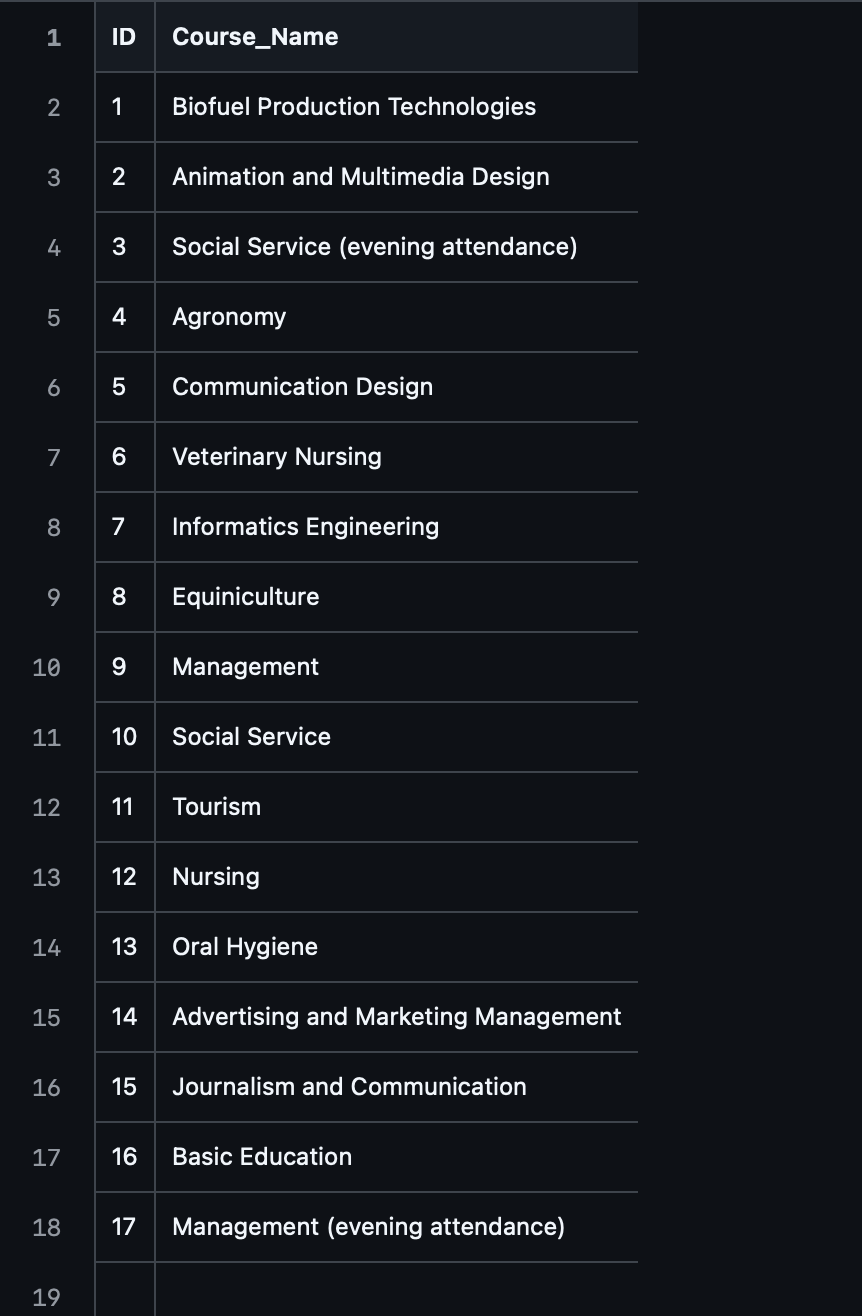

In [17]:
# Summary statistics of 'Unemployment rate' for each 'Target'
unemployment_target_summary = data.groupby('Target')['Unemployment rate'].describe()
unemployment_target_summary


/var/folders/q0/_2hccgrx39v6r5glymkglzdw0000gn/T/ipykernel_72866/3027809647.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unemployment_target_summary = data.groupby('Target')['Unemployment rate'].describe()


,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
Dropout,1421.0,11.616397,2.768259,7.6,9.4,11.1,13.9,16.2
Enrolled,794.0,11.272544,2.628139,7.6,9.4,11.1,12.7,16.2
Graduate,2209.0,11.639339,2.601474,7.6,9.4,11.1,13.9,16.2


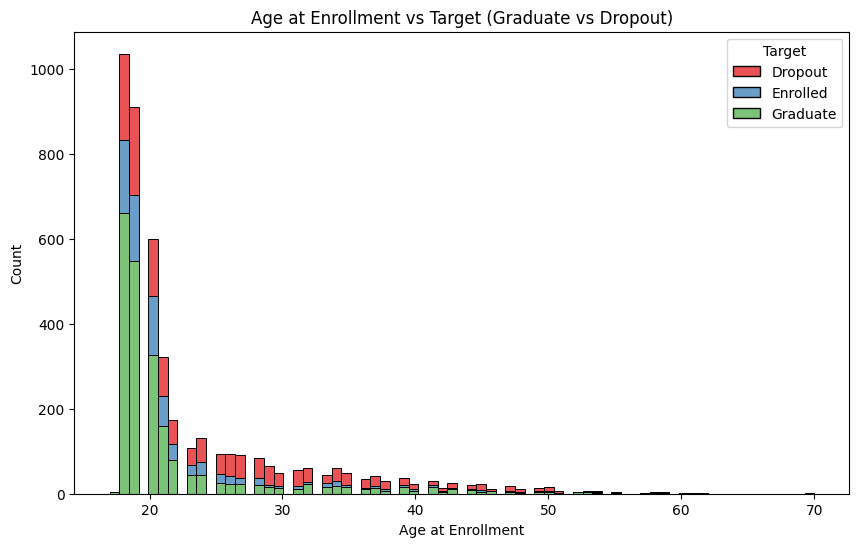

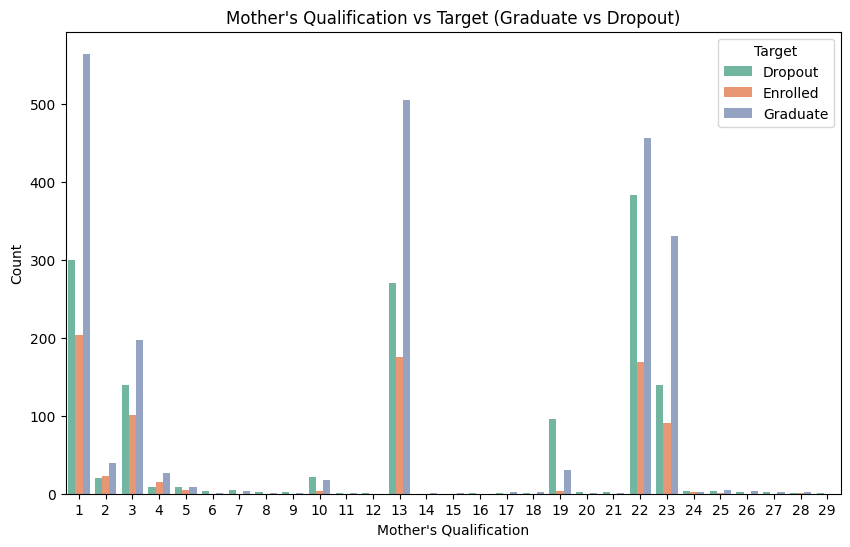

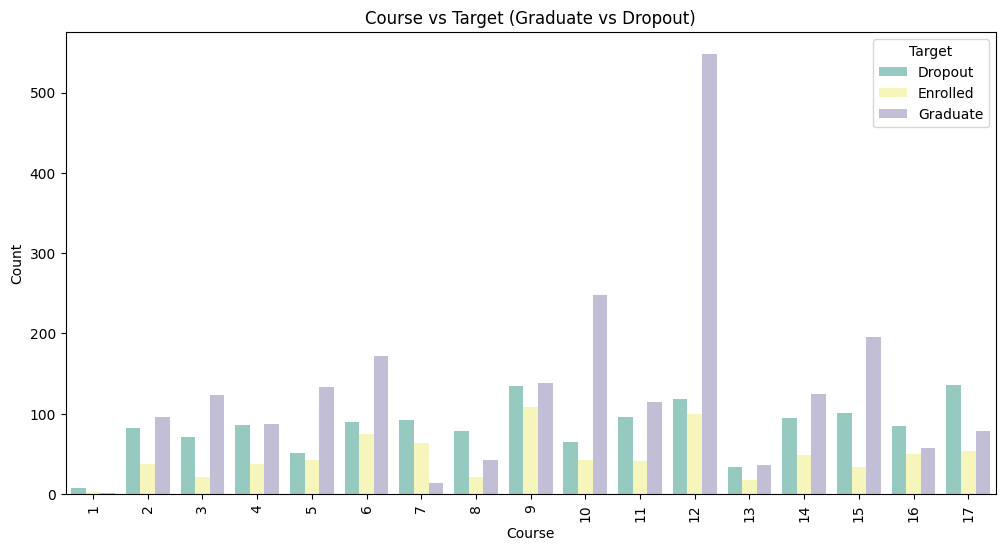

/var/folders/q0/_2hccgrx39v6r5glymkglzdw0000gn/T/ipykernel_72866/2368393078.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='Unemployment rate', data=data, palette='Set1')


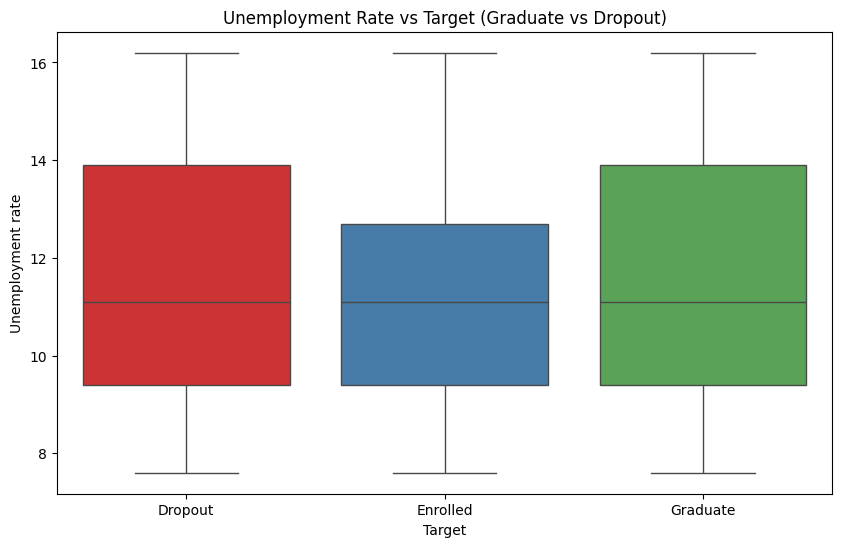

In [9]:
# Let's explore how various features affect the 'Target' variable.
# We'll create a few visualizations for key features:

# 1. Age at Enrollment vs Target
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age at enrollment', hue='Target', multiple='stack', palette='Set1', kde=False)
plt.title("Age at Enrollment vs Target (Graduate vs Dropout)")
plt.xlabel("Age at Enrollment")
plt.ylabel("Count")
plt.show()

# 2. Mother's Qualification vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='Mother\'s qualification', hue='Target', data=data, palette='Set2')
plt.title("Mother's Qualification vs Target (Graduate vs Dropout)")
plt.xlabel("Mother's Qualification")
plt.ylabel("Count")
plt.show()

# 3. Course vs Target
plt.figure(figsize=(12, 6))
sns.countplot(x='Course', hue='Target', data=data, palette='Set3')
plt.title("Course vs Target (Graduate vs Dropout)")
plt.xlabel("Course")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# 4. Economic conditions: Unemployment rate vs Target
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Unemployment rate', data=data, palette='Set1')
plt.title("Unemployment Rate vs Target (Graduate vs Dropout)")
plt.show()




# Insights Based on Visualizations

## 1. Age at Enrollment
- Younger students (around 18–20) seem more likely to graduate.
- Older students have a higher dropout rate.
- Age appears to be a significant factor in student outcomes.



## 3. Course vs Target
- Different courses have varying graduate/dropout ratios.
- Some courses have a higher concentration of dropouts.
- This suggests that certain fields of study might have more challenges or less student retention.

## 4. Unemployment Rate vs Target
- Higher unemployment rates appear to be associated with more dropouts.
- Economic conditions could affect student success, potentially due to financial pressures.


/var/folders/q0/_2hccgrx39v6r5glymkglzdw0000gn/T/ipykernel_72866/610807645.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Mother's qualification", y="Curricular units 2nd sem (grade)", data=data, palette="Blues")
/var/folders/q0/_2hccgrx39v6r5glymkglzdw0000gn/T/ipykernel_72866/610807645.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Father's qualification", y="Curricular units 2nd sem (grade)", data=data, palette="Greens")


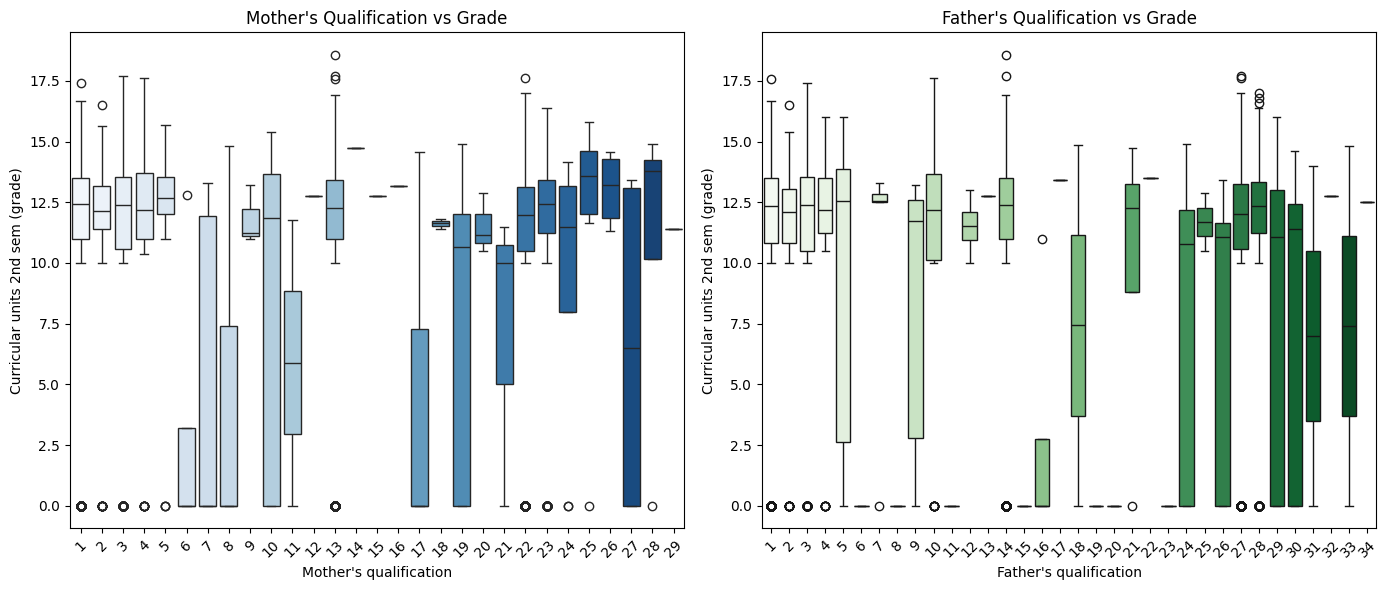

In [10]:
# Plot the relationship between parental qualifications and student performance
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Mother's qualification", y="Curricular units 2nd sem (grade)", data=data, palette="Blues")
plt.title("Mother's Qualification vs Grade")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x="Father's qualification", y="Curricular units 2nd sem (grade)", data=data, palette="Greens")
plt.title("Father's Qualification vs Grade")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


1	Secondary Education—12th Year of Schooling or Equivalent

2	Higher Education—bachelor’s degree

3	Higher Education—degree

4	Higher Education—master’s degree

5	Higher Education—doctorate

6	Frequency of Higher Education

7	12th Year of Schooling—not completed

8	11th Year of Schooling—not completed

9	7th Year (Old)

10	Other—11th Year of Schooling

11	2nd year complementary high school course

12	10th Year of Schooling

13	General commerce course

14	Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent

15	Complementary High School Course

16	Technical-professional course

17	Complementary High School Course—not concluded

18	7th year of schooling

19	2nd cycle of the general high school course

20	9th Year of Schooling—not completed

21	8th year of schooling

22	General Course of Administration and Commerce

23	Supplementary Accounting and Administration

24	Unknown

25	Cannot read or write

26	Can read without having a 4th year of schooling

27	Basic education 1st cycle (4th/5th year) or equivalent

28	Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent

29	Technological specialization course

30	Higher education—degree (1st cycle)

31	Specialized higher studies course

32	Professional higher technical course

33	Higher Education—master’s degree (2nd cycle)

34	Higher Education—doctorate (3rd cycle)

In [11]:
table = data.groupby(['Age at enrollment', 'Target']).size().unstack(fill_value=0)
table

/var/folders/q0/_2hccgrx39v6r5glymkglzdw0000gn/T/ipykernel_72866/3475918600.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = data.groupby(['Age at enrollment', 'Target']).size().unstack(fill_value=0)


Target,Dropout,Enrolled,Graduate
Age at enrollment,,,
17,0,2,3
18,202,172,662
19,207,157,547
20,133,140,326
21,93,70,159
22,58,37,79
23,41,24,43
24,56,30,45
25,47,21,25


/var/folders/q0/_2hccgrx39v6r5glymkglzdw0000gn/T/ipykernel_72866/2100886428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = data.groupby(['Age at enrollment', 'Target']).size().unstack(fill_value=0)


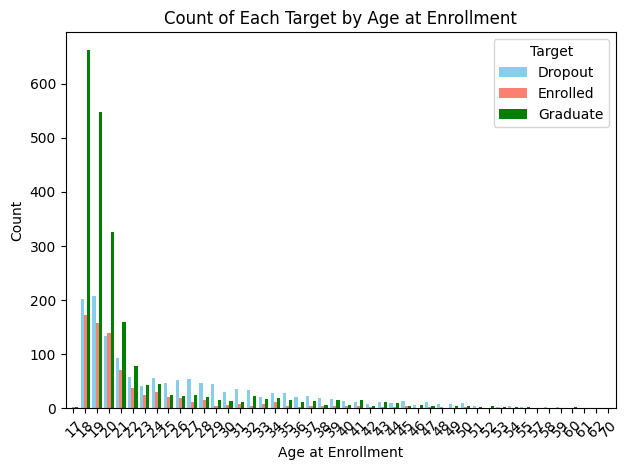

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_train is your DataFrame
# Create the table of counts grouped by 'Age at enrollment' and 'Target'
table = data.groupby(['Age at enrollment', 'Target']).size().unstack(fill_value=0)

# Plotting
ax = table.plot(kind='bar', stacked=False, color=['skyblue', 'salmon', 'green'], width=0.8)
ax.set_xlabel("Age at Enrollment")
ax.set_ylabel("Count")
ax.set_title("Count of Each Target by Age at Enrollment")
plt.legend(title='Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


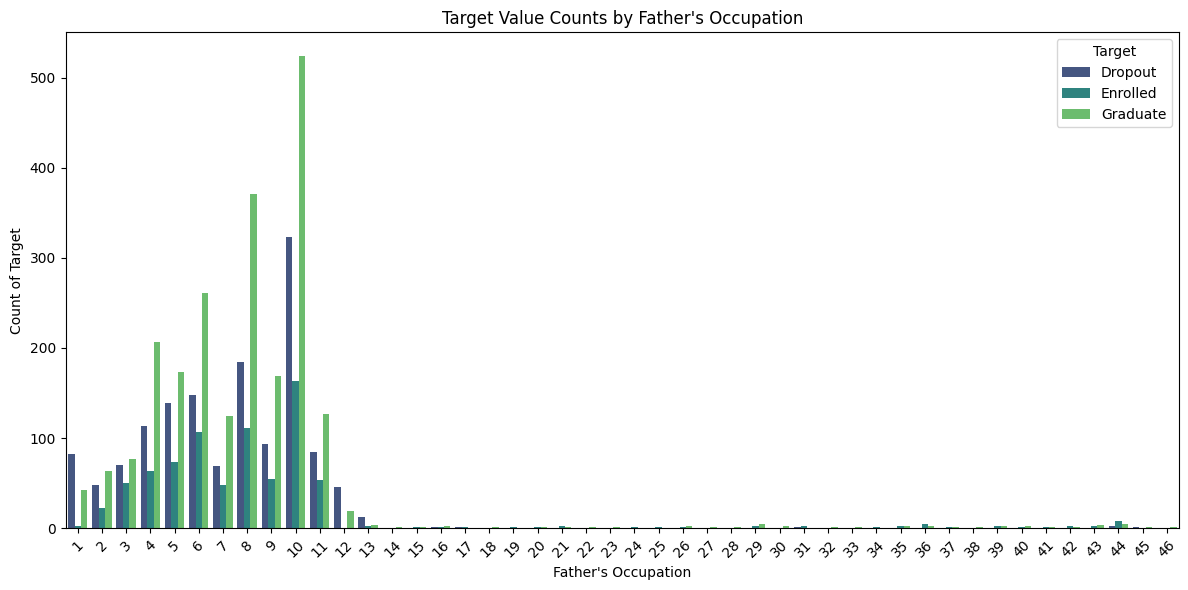

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot showing count of 'Target' by 'Father's occupation'
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="Father's occupation", hue="Target", palette="viridis")

# Add labels and title
plt.xlabel("Father's Occupation")
plt.ylabel("Count of Target")
plt.title("Target Value Counts by Father's Occupation")
plt.legend(title="Target")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


![Screenshot 2024-11-07 at 6.40.51 AM.png](<attachment:Screenshot 2024-11-07 at 6.40.51 AM.png>)
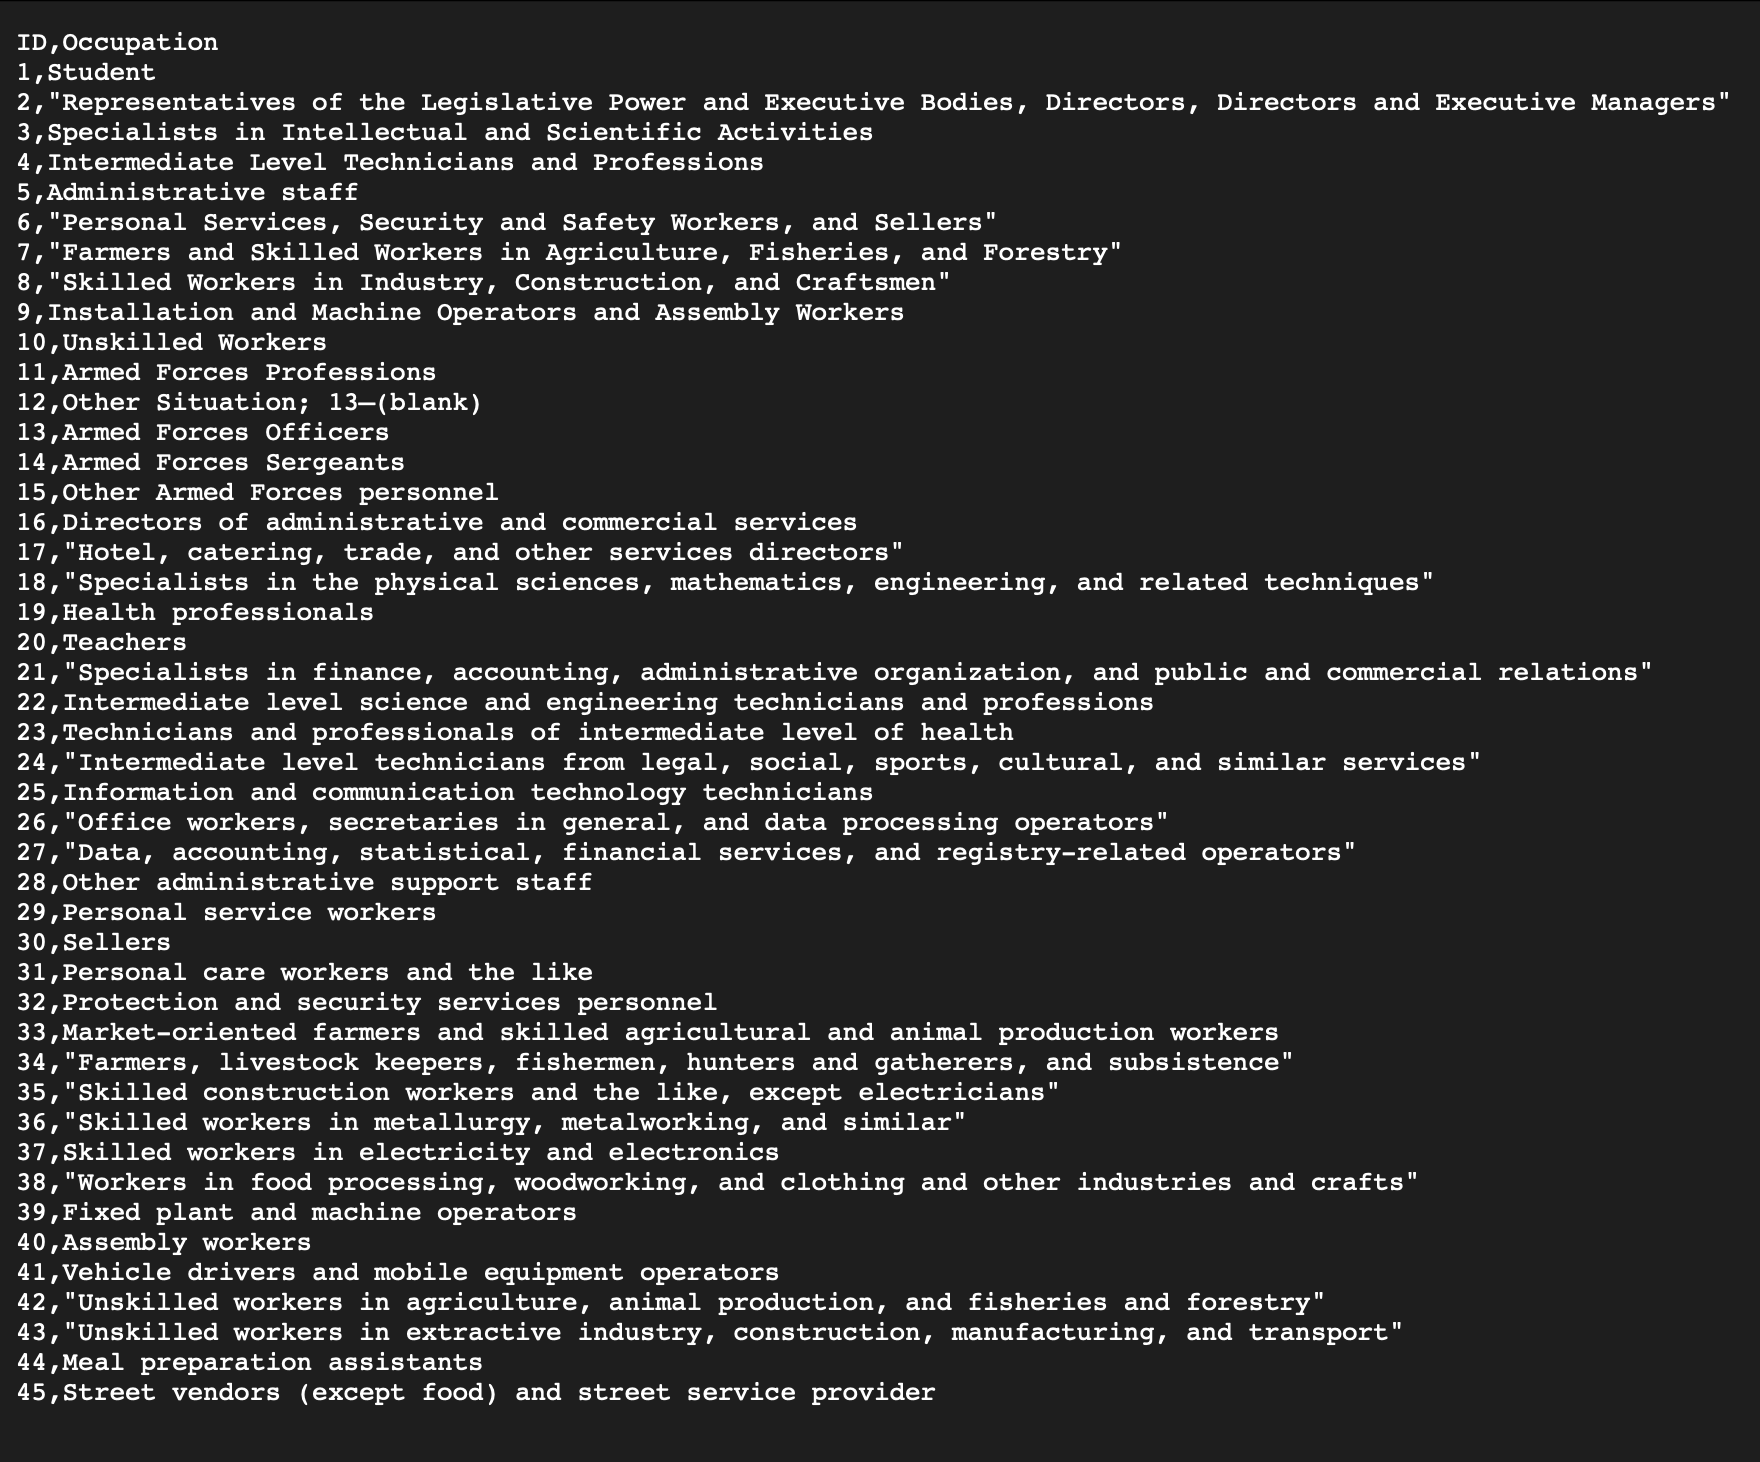

In [14]:
# Create a table of counts of 'Target' values for each 'Father's occupation'
father_occupation_target_counts = data.groupby(["Father's occupation", "Target"]).size().unstack(fill_value=0)
father_occupation_target_counts


/var/folders/q0/_2hccgrx39v6r5glymkglzdw0000gn/T/ipykernel_72866/1492418400.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  father_occupation_target_counts = data.groupby(["Father's occupation", "Target"]).size().unstack(fill_value=0)


Target,Dropout,Enrolled,Graduate
Father's occupation,,,
1,82,3,43
2,48,23,63
3,70,50,77
4,114,63,207
5,139,74,173
6,148,107,261
7,69,48,125
8,184,111,371
9,94,55,169
